In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# collector_df = pd.read_csv('../data/qos/reports.csv')
# sender_df = pd.read_csv('../data/qos/latency_udp.csv')
# t = (200, 260)

# collector_df = pd.read_csv('../data/increasing/reports.csv')
# sender_df = pd.read_csv('../data/increasing/latency_udp.csv')
# t = (400, 450)

# collector_df = pd.read_csv('../data/constant/reports.csv')
# sender_df = pd.read_csv('../data/constant/latency_udp.csv')
# t = (400, 450)

# collector_df = pd.read_csv('../data/http/reports.csv')
# sender_df = pd.read_csv('../data/http/latency_http.csv')
# t = (1860, 1905)


# collector_df = pd.read_csv('../data/http2/reports.csv')
# sender_df = pd.read_csv('../data/http2/latency_http.csv')
# t = (165, 180)


collector_df = pd.read_csv('../data/http4/reports.csv')
sender_df = pd.read_csv('../data/http4/latency_http.csv')
t = (385, 392)


sender_df.columns = ['timestamp', 'latency', 'dropped']

sender_df['latency'] = sender_df['latency'].apply(lambda x: int(x * 1000))
collector_df['hop_latency'] = collector_df['hop_latency'].apply(lambda x: int(x / 1000))

sender_start = sender_df.iloc[0]['timestamp']
collector_start = collector_df.iloc[0]['collector_timestamp']
start = min(sender_start, collector_start)

collector_df['collector_timestamp'] -= start
sender_df['timestamp'] -= start

In [3]:
collector_df.head()

,collector_timestamp,flow_id,collection_id,src_ip,dst_ip,src_port,dst_port,protocol,seq_num,reporting_sw,...,egress_timestamp,hop_latency,ingress_timestamp,l1_egress_port_id,l1_ingress_port_id,l2_egress_port_id,l2_ingress_port_id,queue_occupancy,queue_occupancy_id,switch_id
0,2.376461,0,0,10.244.11.2,10.244.7.2,54662,8000,6,0,8,...,1715635779988801000,0,1715635779988620000,1,3,0,0,0,0,0
1,2.376461,0,0,10.244.11.2,10.244.7.2,54662,8000,6,0,8,...,1715635779989183000,0,1715635779989004000,3,1,0,0,0,0,1
2,2.376461,0,0,10.244.11.2,10.244.7.2,54662,8000,6,0,8,...,1715635779990686000,1,1715635779989408000,3,1,0,0,0,0,0
3,2.376461,0,0,10.244.11.2,10.244.7.2,54662,8000,6,0,8,...,1715635779992448000,1,1715635779990995000,2,1,0,0,0,0,5
4,2.376461,0,0,10.244.11.2,10.244.7.2,54662,8000,6,0,8,...,1715635779994196000,1,1715635779992448000,1,0,0,0,0,0,8


In [4]:
sender_df.head()

,timestamp,latency,dropped
0,0.000000,16,2
1,0.052157,18,3
2,0.129062,45,4
3,0.151559,18,5
4,0.216098,32,6


<Axes: xlabel='collector_timestamp', ylabel='hop_latency'>

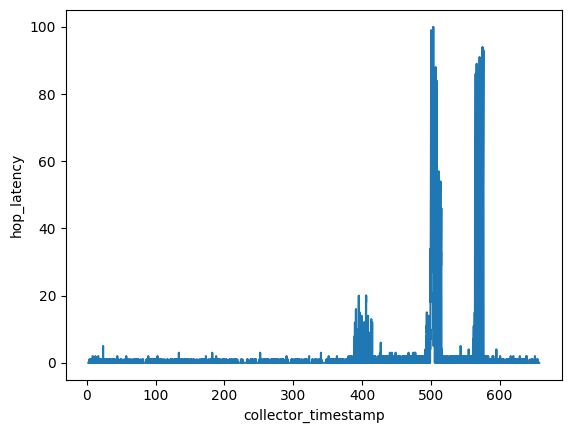

In [5]:
sns.lineplot(data=collector_df[(collector_df['switch_id']==1) & (collector_df['l1_egress_port_id']==3)], x='collector_timestamp', y='hop_latency')

<Axes: xlabel='collector_timestamp', ylabel='queue_occupancy'>

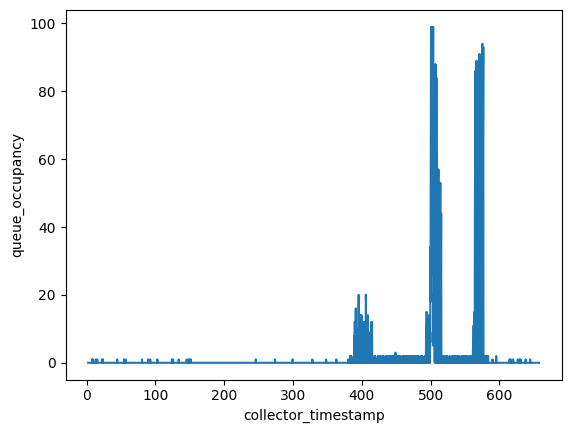

In [6]:
sns.lineplot(data=collector_df[(collector_df['switch_id']==1) & (collector_df['l1_egress_port_id']==3)], x='collector_timestamp', y='queue_occupancy')

<Axes: xlabel='timestamp', ylabel='latency'>

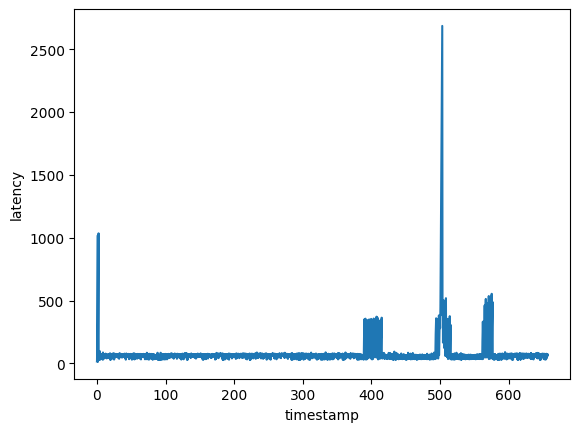

In [7]:
sns.lineplot(data=sender_df, x='timestamp', y='latency')

In [8]:
collector_df

,collector_timestamp,flow_id,collection_id,src_ip,dst_ip,src_port,dst_port,protocol,seq_num,reporting_sw,...,egress_timestamp,hop_latency,ingress_timestamp,l1_egress_port_id,l1_ingress_port_id,l2_egress_port_id,l2_ingress_port_id,queue_occupancy,queue_occupancy_id,switch_id
0,2.376461,0,0,10.244.11.2,10.244.7.2,54662,8000,6,0,8,...,1715635779988801000,0,1715635779988620000,1,3,0,0,0,0,0
1,2.376461,0,0,10.244.11.2,10.244.7.2,54662,8000,6,0,8,...,1715635779989183000,0,1715635779989004000,3,1,0,0,0,0,1
2,2.376461,0,0,10.244.11.2,10.244.7.2,54662,8000,6,0,8,...,1715635779990686000,1,1715635779989408000,3,1,0,0,0,0,0
3,2.376461,0,0,10.244.11.2,10.244.7.2,54662,8000,6,0,8,...,1715635779992448000,1,1715635779990995000,2,1,0,0,0,0,5
4,2.376461,0,0,10.244.11.2,10.244.7.2,54662,8000,6,0,8,...,1715635779994196000,1,1715635779992448000,1,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702557,657.665809,140511,0,10.244.11.2,10.244.7.2,33618,8000,6,40716,8,...,1715636435285079000,0,1715636435284650000,3,1,0,0,0,0,0
702558,657.665809,140511,0,10.244.11.2,10.244.7.2,33618,8000,6,40716,8,...,1715636435286337000,0,1715636435285694000,2,1,0,0,0,0,5
702559,657.665809,140511,0,10.244.11.2,10.244.7.2,33618,8000,6,40716,8,...,1715636435287463000,1,1715636435286337000,1,0,0,0,0,0,8
702560,657.666443,140512,0,10.244.11.2,10.244.4.2,33614,8000,6,39568,6,...,1715636435284256000,1,1715636435282624000,1,3,0,0,1,0,0


In [9]:
collector_df['port_key'] = collector_df.apply(lambda row: f'{row["switch_id"]}_{row["l1_egress_port_id"]}', axis=1)

In [10]:
collector_df['port_key'].unique()

array(['0_1', '1_3', '0_3', '5_2', '8_1', '5_1', '1_1', '0_2', '6_1'],
      dtype=object)

<Axes: xlabel='collector_timestamp', ylabel='hop_latency'>

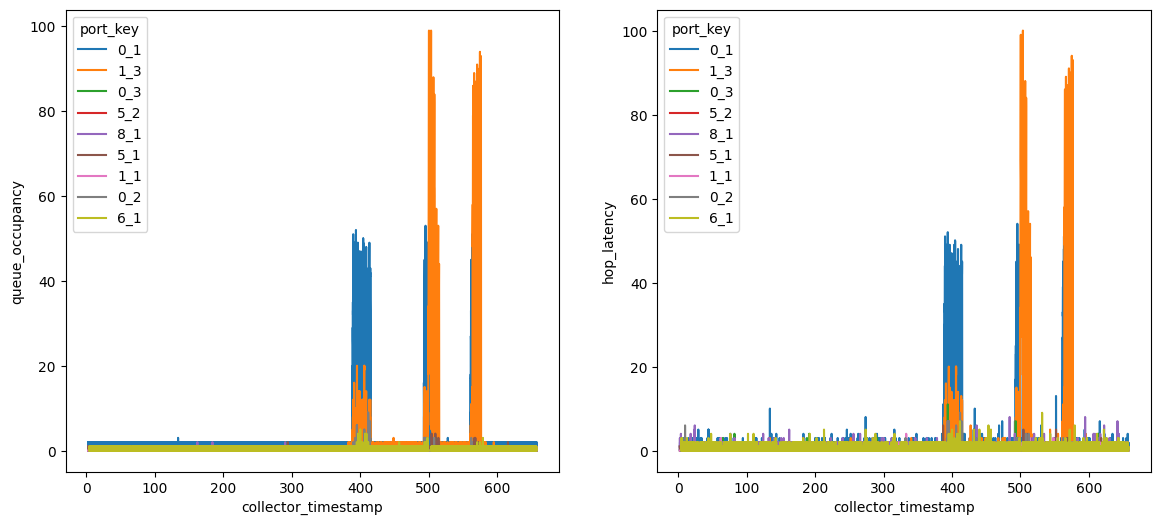

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.lineplot(ax=ax[0], data=collector_df, x='collector_timestamp', y='queue_occupancy', hue='port_key', legend=True, estimator=None, n_boot=0)
sns.lineplot(ax=ax[1], data=collector_df, x='collector_timestamp', y='hop_latency', hue='port_key', legend=True, estimator=None, n_boot=0)

<Axes: xlabel='collector_timestamp', ylabel='hop_latency'>

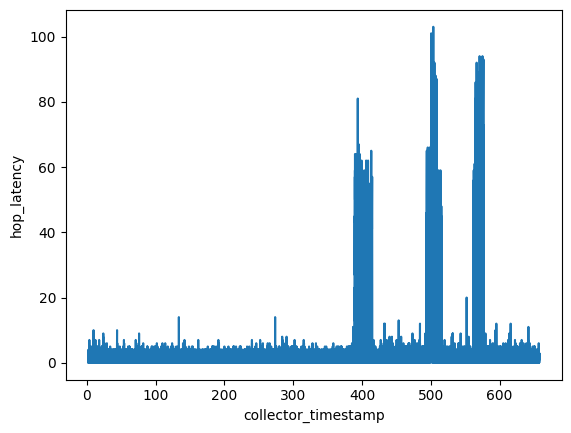

In [12]:
grouped_df = collector_df.groupby(by='flow_id').agg({'hop_latency': 'sum', 'collector_timestamp': 'first'})
sns.lineplot(data=grouped_df, x='collector_timestamp', y='hop_latency')


<Axes: xlabel='collector_timestamp', ylabel='hop_latency'>

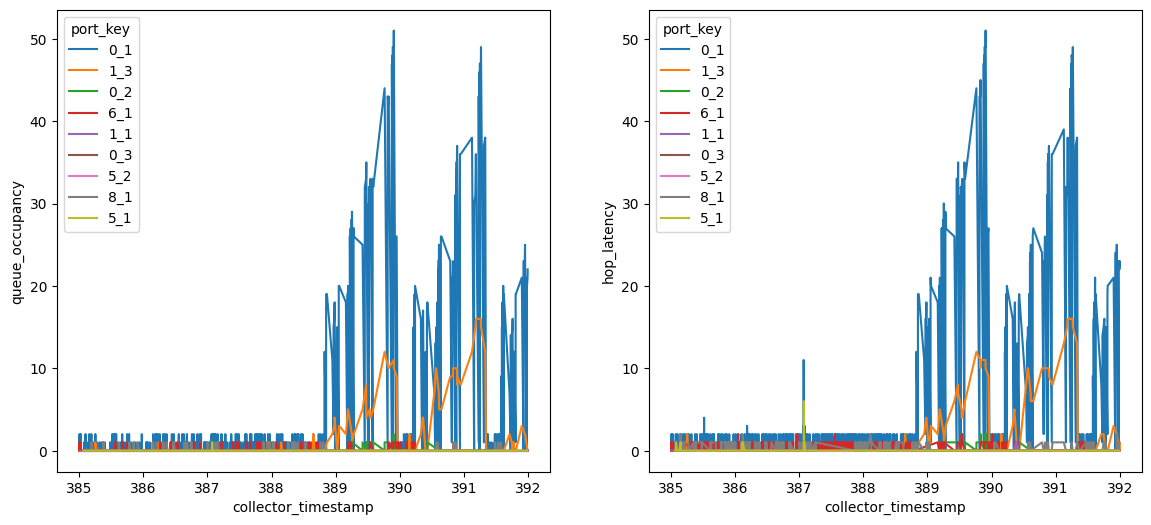

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
N = len(collector_df)
sns.lineplot(ax=ax[0], data=collector_df[(collector_df['collector_timestamp'] > t[0]) & (collector_df['collector_timestamp'] < t[1])], x='collector_timestamp', y='queue_occupancy', hue='port_key', legend=True, estimator=None, n_boot=0)
sns.lineplot(ax=ax[1], data=collector_df[(collector_df['collector_timestamp'] > t[0]) & (collector_df['collector_timestamp'] < t[1])], x='collector_timestamp', y='hop_latency', hue='port_key', legend=True, estimator=None, n_boot=0)

In [14]:
np.sum(sender_df['latency'] > 100)

198

<Axes: xlabel='timestamp', ylabel='latency'>

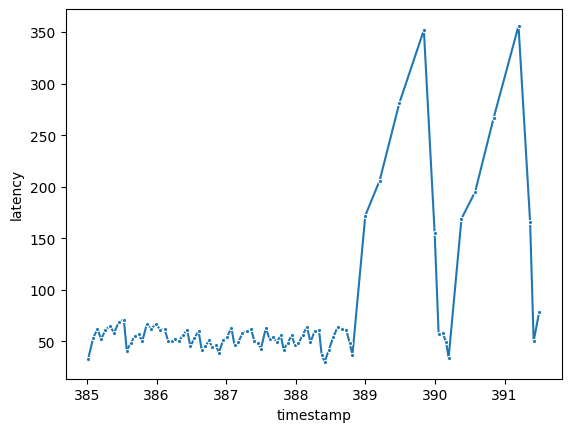

In [15]:
sns.lineplot(data=sender_df[(sender_df['timestamp'] > t[0]) & (sender_df['timestamp'] < t[1]-0.5)],
             x='timestamp', y='latency', marker='o', markersize=3)

<Axes: xlabel='timestamp', ylabel='dropped'>

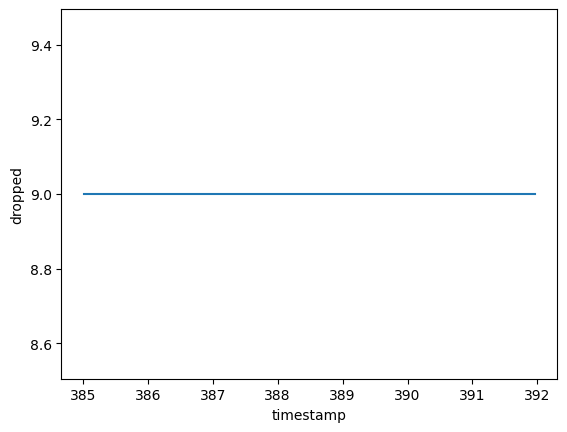

In [16]:
sns.lineplot(data=sender_df[(sender_df['timestamp'] > t[0]) & (sender_df['timestamp'] < t[1])], x='timestamp', y='dropped')

In [17]:
cols = ['timestamp', 'averagePathLatency', 'onePercentileSlowestPathLatency', 'port_key', 'averageLatency',
        'onePercentileSlowestLatency', 'onePercentileLargestQueueFillState', 'averageQueueFillState', 'packets']
rows = []
import json
max_i = 2026
for i in range(max_i+1):
    with open(f'./../data/http4/logs{i}.json', 'r') as f:
        data = json.load(f)
        base_row = [
            data['createdAt'] - start,
            data['windowMetrics']['averagePathLatencyMicroS'] / 1000,
            data['windowMetrics']['onePercentileSlowestPathLatencyMicroS'] / 1000,
        ]
        for dm in data['windowMetrics']['deviceMetrics']:
            for pm in dm['portMetrics']:
                row = [*base_row]
                port_key = f'{dm["deviceName"]}_{pm["toDevice"]}'
                row.extend([
                    port_key,
                    pm['averageLatencyMicroS'] / 1000,
                    pm['onePercentileSlowestLatencyMicroS'] / 1000,
                    pm['onePercentileLargestQueueFillState'],
                    pm['averageQueueFillState'],
                    pm['packets'],
                ])
                rows.append(row)

summary_df = pd.DataFrame.from_records(rows, columns=cols)
summary_df.head()

,timestamp,averagePathLatency,onePercentileSlowestPathLatency,port_key,averageLatency,onePercentileSlowestLatency,onePercentileLargestQueueFillState,averageQueueFillState,packets
0,380.372944,4.658,8.297,r1_r7,0.864,2.713,2,0,1342
1,380.372944,4.658,8.297,r1_tree-worker,0.373,0.903,0,0,576
2,380.372944,4.658,8.297,r1_tree-worker12,0.378,1.003,0,0,356
3,380.372944,4.658,8.297,r7_r1,0.326,0.780,0,0,482
4,380.372944,4.658,8.297,r7_r10,0.371,0.984,0,0,644


In [18]:
# t=(170, 230)

<Axes: xlabel='timestamp', ylabel='onePercentileSlowestPathLatency'>

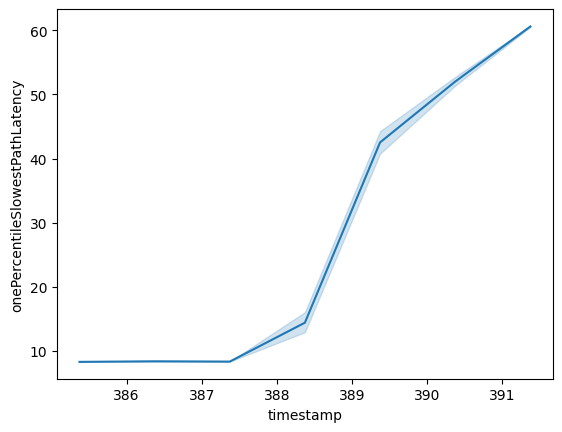

In [19]:
sns.lineplot(data=summary_df[(summary_df['timestamp'] > t[0]) & (summary_df['timestamp'] < t[1])], x='timestamp', y='onePercentileSlowestPathLatency')

<Axes: xlabel='timestamp', ylabel='latency'>

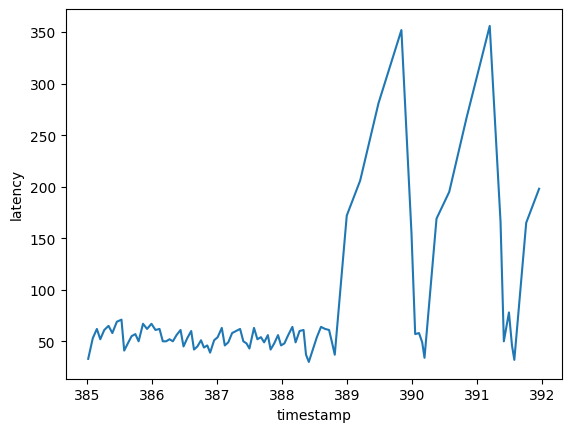

In [20]:
sns.lineplot(data=sender_df[(sender_df['timestamp'] > t[0]) & (sender_df['timestamp'] < t[1])], x='timestamp', y='latency')

<Axes: xlabel='timestamp', ylabel='averageLatency'>

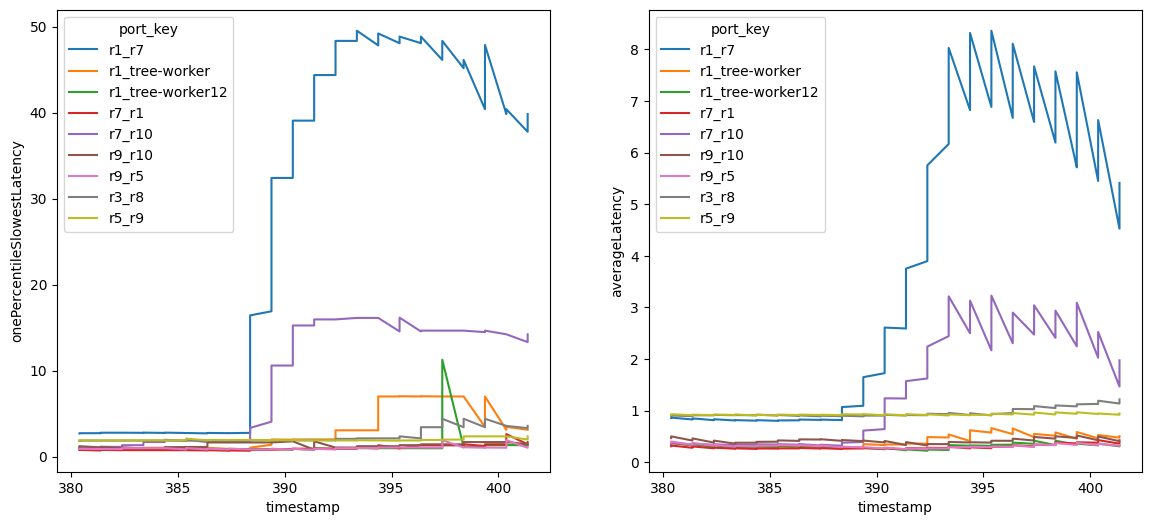

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
N = len(collector_df)
sns.lineplot(ax=ax[0], data=summary_df[(summary_df['timestamp'] > t[0] - 5) & (summary_df['timestamp'] < t[1] + 10)], x='timestamp', y='onePercentileSlowestLatency', hue='port_key', legend=True, estimator=None, n_boot=0)
sns.lineplot(ax=ax[1], data=summary_df[(summary_df['timestamp'] > t[0] - 5) & (summary_df['timestamp'] < t[1] + 10)], x='timestamp', y='averageLatency', hue='port_key', legend=True, estimator=None, n_boot=0)

<Axes: xlabel='timestamp', ylabel='averageQueueFillState'>

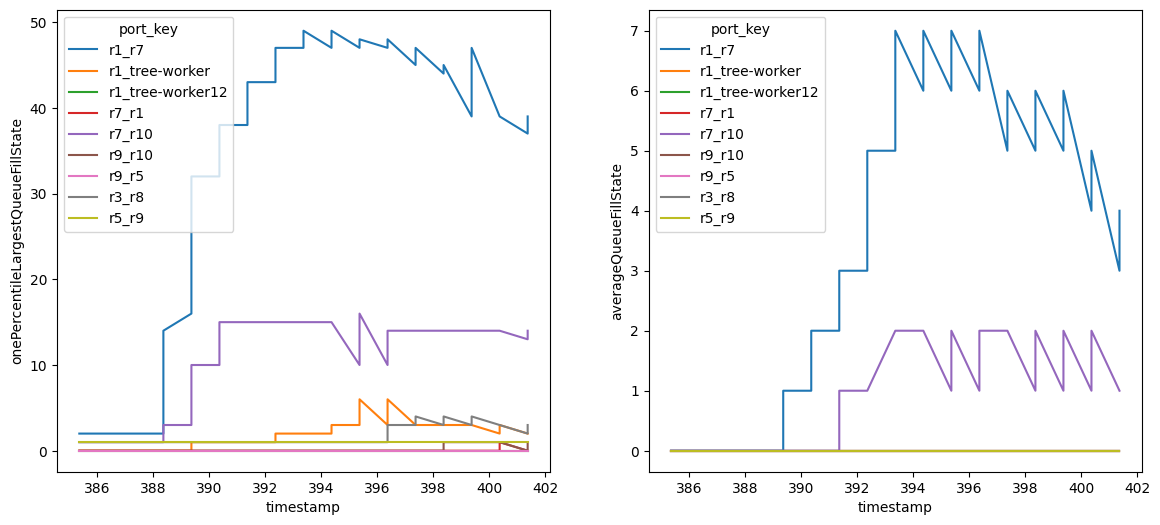

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
N = len(collector_df)
sns.lineplot(ax=ax[0], data=summary_df[(summary_df['timestamp'] > t[0]) & (summary_df['timestamp'] < t[1] + 10)], x='timestamp', y='onePercentileLargestQueueFillState', hue='port_key', legend=True, estimator=None, n_boot=0)
sns.lineplot(ax=ax[1], data=summary_df[(summary_df['timestamp'] > t[0]) & (summary_df['timestamp'] < t[1] + 10)], x='timestamp', y='averageQueueFillState', hue='port_key', legend=True, estimator=None, n_boot=0)